In [ ]:
# Import modules required
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout
from keras import Sequential
import os
import matplotlib.pyplot as plt
import cv2

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Import Kaggle dataset
!kaggle competitions download -c dogs-vs-cats

 98% 795M/812M [00:07<00:00, 155MB/s]
100% 812M/812M [00:07<00:00, 108MB/s]


In [ ]:
# UNZIP THE DATA
!unzip /content/dogs-vs-cats.zip
!unzip /content/train.zip
!unzip /content/test1.zip

Archive:  /content/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [ ]:
#Creating the folder or Directory name trian1
!mkdir -p train1/cats train1/dogs

In [ ]:
# image = plt.imread('/content/train/cat.0.jpg')
# image.shape

(374, 500, 3)

In [ ]:
#Copy the kaggle dataset images into train1 directory
import os
import shutil

list_v = os.listdir('/content/train')
cat_images = []
dog_images = []

# Collect file names based on category
for i in list_v:
    if 'cat' in i:
        cat_images.append(i)
    elif 'dog' in i:
        dog_images.append(i)

# Copy cat images
source_folder = '/content/train'
destination_folder = '/content/train1/cats'
os.makedirs(destination_folder, exist_ok=True)  # Ensure destination folder exists

for file_name in cat_images:
    full_file_name = os.path.join(source_folder, file_name)
    if os.path.isfile(full_file_name):  # Ensure it's a file
        shutil.copy(full_file_name, destination_folder)  # Copy file

# Copy dog images
destination_folder = '/content/train1/dogs'
os.makedirs(destination_folder, exist_ok=True)  # Ensure destination folder exists

for file_name in dog_images:
    full_file_name = os.path.join(source_folder, file_name)
    if os.path.isfile(full_file_name):  # Ensure it's a file
        shutil.copy(full_file_name, destination_folder)  # Copy file


In [ ]:
'''Delete directory'''
# import shutil

# # Path to the directory you want to delete
# dir_path = '/content/train1/images'

# # Delete the directory
# shutil.rmtree(dir_path)


In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train1',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 60,
    image_size = (256,256)
)
# validation_ds = keras.utils.image_dataset_from_directory(
#     directory = '/content/test1',
#     labels = 'inferred',
#     label_mode = 'int',
#     batch_size = 32,
#     image_size = (256,256)
# )

Found 25000 files belonging to 2 classes.


In [ ]:
#Normalization yani 255 se divide 0 to 1 ke bitch mai values hongi
def process(image,label):
  image = tf.cast(image/255,tf.float32)
  return image,label

train_ds = train_ds.map(process)
# validation_ds = train_ds.map(process)

In [ ]:
#CREATE CNN MODEL
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# history = model.fit(train_ds,validation_data=validation_ds,epochs=10)
history = model.fit(train_ds,epochs=8)

Epoch 1/8
417/417 ━━━━━━━━━━━━━━━━━━━━ 66s 142ms/step - accuracy: 0.5510 - loss: 2.4938
Epoch 2/8
417/417 ━━━━━━━━━━━━━━━━━━━━ 57s 135ms/step - accuracy: 0.5571 - loss: 0.6815
Epoch 3/8
417/417 ━━━━━━━━━━━━━━━━━━━━ 56s 133ms/step - accuracy: 0.5806 - loss: 0.6624
Epoch 4/8
417/417 ━━━━━━━━━━━━━━━━━━━━ 62s 148ms/step - accuracy: 0.6514 - loss: 0.6263
Epoch 5/8
417/417 ━━━━━━━━━━━━━━━━━━━━ 79s 140ms/step - accuracy: 0.7158 - loss: 0.5713
Epoch 6/8
417/417 ━━━━━━━━━━━━━━━━━━━━ 57s 137ms/step - accuracy: 0.7730 - loss: 0.4876
Epoch 7/8
417/417 ━━━━━━━━━━━━━━━━━━━━ 55s 132ms/step - accuracy: 0.8015 - loss: 0.4264
Epoch 8/8
417/417 ━━━━━━━━━━━━━━━━━━━━ 84s 137ms/step - accuracy: 0.8287 - loss: 0.3724


In [ ]:
history

In [ ]:
img = cv2.imread('/content/test1/1.jpg')

In [ ]:
img.shape

(499, 381, 3)

In [ ]:
# Resize the image
resized_image = cv2.resize(img, (256, 256))
resized_image = resized_image/255

array([[[ 95,  65,  38],
        [ 96,  62,  36],
        [101,  65,  39],
        ...,
        [218, 123,  88],
        [193, 101,  65],
        [173,  85,  48]],

       [[101,  71,  44],
        [100,  66,  40],
        [ 98,  62,  36],
        ...,
        [216, 120,  87],
        [191,  98,  64],
        [171,  83,  47]],

       [[ 96,  67,  39],
        [ 94,  60,  33],
        [ 93,  57,  31],
        ...,
        [216, 118,  90],
        [192,  97,  66],
        [172,  81,  50]],

       ...,

       [[183, 172, 168],
        [193, 182, 178],
        [199, 187, 183],
        ...,
        [ 89, 110, 110],
        [ 87, 108, 111],
        [ 83, 107, 111]],

       [[172, 166, 163],
        [183, 176, 173],
        [195, 186, 182],
        ...,
        [ 96, 111, 114],
        [ 67,  88,  92],
        [ 66,  90,  95]],

       [[175, 174, 171],
        [179, 175, 172],
        [188, 181, 178],
        ...,
        [132, 143, 152],
        [ 90, 109, 118],
        [ 80, 102, 112]]], dtype=uint8)
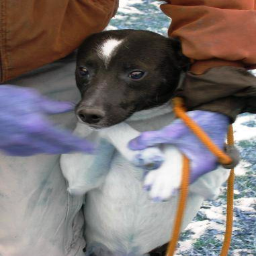

In [ ]:
resized_image

In [ ]:
def preprocess_image(image_path):
    # Load the image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)

    # Resize the image
    image = tf.image.resize(image, [256, 256])

    # Normalize pixel values to [0, 1] if required
    image = image / 255.0

    return image

In [ ]:
resize_image=preprocess_image('/content/test1/10.jpg')

In [ ]:
# If you have a batch of images
batch_of_images = tf.stack([resize_image])

In [ ]:
model.predict(batch_of_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[0.06716798]], dtype=float32)

In [ ]:
# Save the model in HDF5 format
model.save('model_CatvsDog.h5')

In [ ]:
model.save('model_CatvsDog.keras')

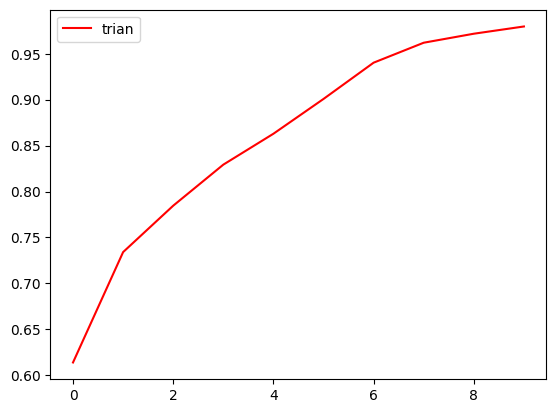

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='trian')
# plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>